In [59]:
import numpy as np
import pandas as pd
import sklearn as sk
from matplotlib import pyplot as plt

In [60]:
f=pd.read_csv(r"C:\Users\osama\Downloads\AI & IOT ASSIGNMENT FINAL\CO2 Emissions_Canada.csv")
#specified number of rows, string from the top IF NOT DEFINED FIRST 5 TAKEN
f.head()


,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [61]:
#Tells us the dimension the number of rows and columns(Rows,columns)
f.shape

(7385, 12)

In [62]:
#Identifying the total columns and their names 
f.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [63]:
#Description of the data in the DataFrame
f.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [64]:
#DATA CLEANING IN THE EXCEL FILE
#Dropping the columns that are deemed unnecessory 
d1=f.drop(['Make','Model','Vehicle Class','Transmission','Fuel Consumption Comb (mpg)'], axis = 1)
d1.head()

,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,2.0,4,Z,9.9,6.7,8.5,196
1,2.4,4,Z,11.2,7.7,9.6,221
2,1.5,4,Z,6.0,5.8,5.9,136
3,3.5,6,Z,12.7,9.1,11.1,255
4,3.5,6,Z,12.1,8.7,10.6,244


In [65]:
d1.columns

Index(['Engine Size(L)', 'Cylinders', 'Fuel Type',
       'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)',
       'Fuel Consumption Comb (L/100 km)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [66]:
# Checking for null values
pd.isna(d1).sum()
#As there are no null values OR nan values so no further averaging is required to fill those null or nan values

Engine Size(L)                      0
Cylinders                           0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
CO2 Emissions(g/km)                 0
dtype: int64

In [67]:
#Enconding the data using categorical encoding 
#Importing the label encoder from sklearn library 
from sklearn.preprocessing import LabelEncoder
#Assigning the variable to the encoder
le = LabelEncoder()
#Transforing the fuel type using the label encoder
d1["Fuel Type"] = le.fit_transform(d1["Fuel Type"])
d1.head(5)

,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,2.0,4,4,9.9,6.7,8.5,196
1,2.4,4,4,11.2,7.7,9.6,221
2,1.5,4,4,6.0,5.8,5.9,136
3,3.5,6,4,12.7,9.1,11.1,255
4,3.5,6,4,12.1,8.7,10.6,244


In [68]:
le.classes_

array(['D', 'E', 'N', 'X', 'Z'], dtype=object)

In [69]:
# Save the DataFrame as a CSV file
d1.to_csv(r"C:\Users\osama\Downloads\AI & IOT ASSIGNMENT FINAL\CO2 Emissions_Canada_TRANSORMED.csv", index=False)

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\osama\\Downloads\\AI & IOT ASSIGNMENT FINAL\\CO2 Emissions_Canada_TRANSORMED.csv'

In [70]:
# Importing Train Test Split Function 
#importing the train test split from sklearn library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Copying the df into another variable
f1=d1.copy()
# Creating X and Y out of the dataframe
x = d1.drop(['CO2 Emissions(g/km)'],axis='columns')
y = d1["CO2 Emissions(g/km)"]
# Split the dataset into a train set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.45, random_state=48)

# Create a StandardScaler object to scale data
scaler = StandardScaler()

# Fit the scaler to the training data
scaler.fit(x_train)

# Transform the training and test sets
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# Check the shapes of the input and target data
print(f'x_test shape: {x_test.shape}')
print(f'y_test shape: {y_test.shape}')

x_test shape: (3324, 6)
y_test shape: (3324,)


In [71]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

In [72]:
#lINEAR REGRESSION
# Importing Model
from sklearn.linear_model import LinearRegression
# Storing it inside a variable
lr = LinearRegression()
# Fitting the model to train set
lr.fit(x_train,y_train)
# Checking the R2 Score on train and test set
print("The Train Accuracy is:",lr.score(x_train,y_train))
print("The Test Accuracy is:",lr.score(x_test,y_test))


The Train Accuracy is: 0.8992772117231083
The Test Accuracy is: 0.897317551808833


In [73]:
# Prediction model for linear regression
pred_linreg=lr.predict(x_test)
print('-' * 40)
print("Prediction:",lr.predict(x_test))
print('-' * 40)
# Calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(y_test,pred_linreg))
# Root mean squared error
print(f'Root mean squared error: {rmse: .4f}')
print('-' * 40)
# Calculate the adjusted R-squared
adj_r2 = r2_score(y_test,pred_linreg, sample_weight=None, multioutput='uniform_average')
# Print the adjusted R-squared
print(f'Adjusted R-squared: {adj_r2: .4f}')
print('-' * 40)



----------------------------------------
Prediction: [312.92215496 198.90373252 212.24391534 ... 233.45496483 227.0470654
 281.54576495]
----------------------------------------
Root mean squared error:  18.4946
----------------------------------------
Adjusted R-squared:  0.8973
----------------------------------------


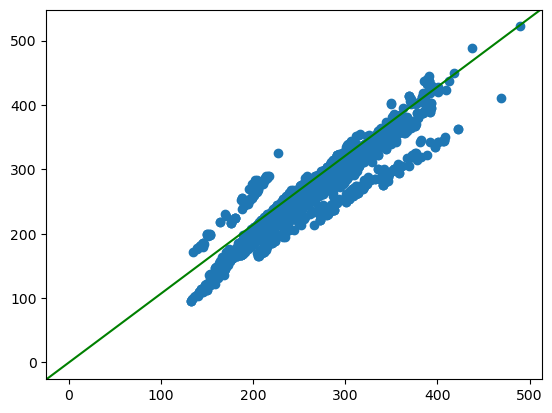

In [74]:
from matplotlib import pyplot as plt

y_pred = lr.predict(x_test)
plt.scatter(y_pred,y_test)
plt.axline((0, 0), slope=1.0705 , color='green')
plt.show()

In [75]:
# DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)

# Fit the model to the training data
regressor.fit(x_train,y_train)
print("The Train Accuracy is:",regressor.score(x_train,y_train))
print("The Test Accuracy is:",regressor.score(x_test,y_test))


The Train Accuracy is: 0.999651565226641
The Test Accuracy is: 0.9966924605846575


In [76]:
# Prediction model for Decision tree regression
pred_decreg=regressor.predict(x_test)
print('-' * 40)
print("Prediction:",regressor.predict(x_test))
print('-' * 32)


# Calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(y_test,pred_decreg))


# Print the root mean squared error
print(f'Root mean squared error: {rmse: .5f}')
print('-' * 40)


# Calculate the adjusted R-squared
adj_r2 = r2_score(y_test,pred_decreg, sample_weight=None, multioutput='uniform_average')


# Print the adjusted R-squared
print(f'Adjusted R-squared: {adj_r2: .5f}')
print('-' * 40)


----------------------------------------
Prediction: [326.         199.         217.66666667 ... 236.5        227.
 300.        ]
--------------------------------
Root mean squared error:  3.31932
----------------------------------------
Adjusted R-squared:  0.99669
----------------------------------------


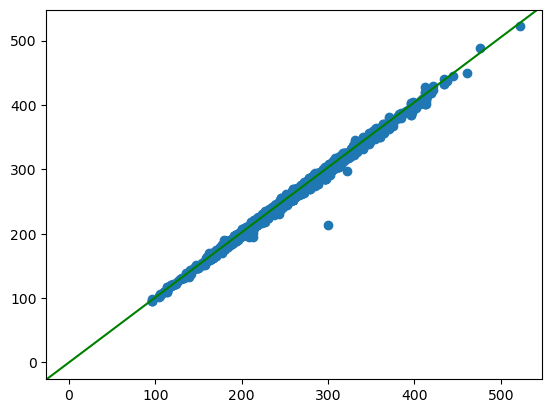

In [77]:
from matplotlib import pyplot as plt

y_pred = regressor.predict(x_test)
plt.scatter(y_pred,y_test)
plt.axline((0, 0), slope=1.0105 , color='green')
plt.show()

In [78]:
#RANDOM FOREST REGRESSOR 
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor()

# Fit the model to the training data
regr.fit(x_train,y_train)

#Print the result data
print("The Train Accuracy is:",regr.score(x_train,y_train))
print("The Test Accuracy is:",regr.score(x_test,y_test))

The Train Accuracy is: 0.9991586594759669
The Test Accuracy is: 0.9961378162629718


In [79]:
# Prediction model for RandomForestRegressor
pred_ranforreg=regr.predict(x_test)
print('-' * 42)
print("Prediction:",regr.predict(x_test))
print('-' * 42)


# Calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(y_test,pred_ranforreg))


# Print the root mean squared error
print(f'Root mean squared error: {rmse: .5f}')
print('-' * 32)


# Calculate the adjusted R-squared
adj_r2 = r2_score(y_test,pred_ranforreg, sample_weight=None, multioutput='uniform_average')


# Print the adjusted R-squared
print(f'Adjusted R-squared: {adj_r2: .5f}')
print('-' * 32)


------------------------------------------
Prediction: [325.94285714 198.41688095 217.64846825 ... 236.21       226.78664286
 300.29      ]
------------------------------------------
Root mean squared error:  3.58685
--------------------------------
Adjusted R-squared:  0.99614
--------------------------------


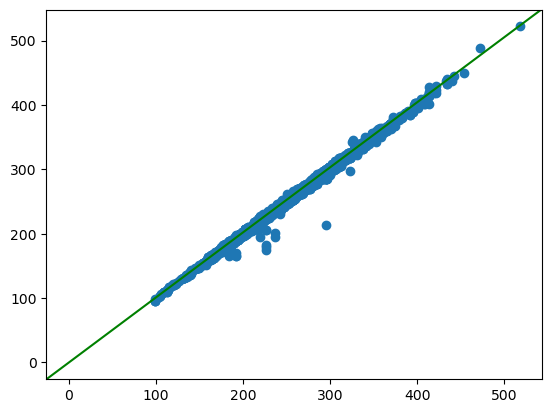

In [80]:
from matplotlib import pyplot as plt

y_pred = regr.predict(x_test)
plt.scatter(y_pred,y_test)
plt.axline((0, 0), slope=1.0105 , color='green')
plt.show()

In [81]:

from sklearn import neighbors
knn = neighbors.KNeighborsRegressor()

# Fit the model to the training data
knn.fit(x_train,y_train)

# Print the results 
print("The Train Accuracy is:",knn.score(x_train,y_train))
print("The Test Accuracy is:",knn.score(x_test,y_test))


The Train Accuracy is: 0.9969566751205416
The Test Accuracy is: 0.9952757337920818


In [82]:
# Prediction model for KNeighborsRegressor
pred_kneigh=knn.predict(x_test)
print("Prediction:",knn.predict(x_test))
print('-' * 40)


# Calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(y_test,pred_kneigh))


# Print the root mean squared error
print(f'Root mean squared error: {rmse:.4f}')
print('-' * 40)


# Calculate the adjusted R-squared
adj_r2 = r2_score(y_test,pred_kneigh, sample_weight=None, multioutput='uniform_average')
# Print the adjusted R-squared


print(f'Adjusted R-squared: {adj_r2: .4f}')
print('-' * 40)


Prediction: [325.6 199.2 216.8 ... 238.8 227.4 299.8]
----------------------------------------
Root mean squared error: 3.9670
----------------------------------------
Adjusted R-squared:  0.9953
----------------------------------------


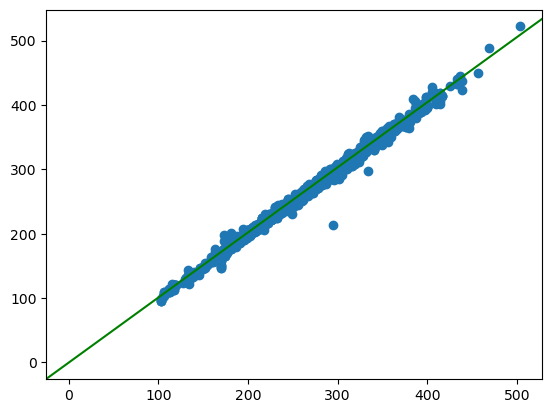

In [83]:
from matplotlib import pyplot as plt

y_pred = knn.predict(x_test)
plt.scatter(y_pred,y_test)
plt.axline((0, 0), slope=1.0105 , color='green')
plt.show()

In [84]:
#Predict the CO2 emissions of two data points using Linear Regression model:


# Define the two data points to predict using the numpy array function
data_pts = np.array([[1, 2, 3, 4, 5, 6],[7, 8, 9, 10, 11, 12]])

# Define the column names of independant variables 
column_names = ['Engine Size(L)', 'Cylinders', 'Fuel Type',
                'Fuel Consumption City (L/100 km)', 
                'Fuel Consumption Hwy (L/100 km)',
                'Fuel Consumption Comb (L/100 km)']

# Load the data into a Pandas dataframe using panda library 
dt_2 = pd.DataFrame(data_pts, columns=column_names)

# Fit the StandardScaler on the data
scaler = StandardScaler()
scaler.fit(dt_2)

# Transform the data points using the scaler
scale_dta_pts = scaler.transform(dt_2)

# Make predictions on the data points using the predicted function from Random forest regressor
predicted = np.around(lr.predict(scale_dta_pts),4)

# Print the predicted points 
print('The predicted points are',predicted,"g/km")

The predicted points are [183.5984 317.916 ] g/km


In [85]:
#Predict the CO2 emissions of two data points using Random Forest model:


# Define the two data points to predict using the numpy array function
data_pts = np.array([[1, 2, 3, 4, 5, 6],[7, 8, 9, 10, 11, 12]])

# Define the column names of independant variables 
column_names = ['Engine Size(L)', 'Cylinders', 'Fuel Type',
                'Fuel Consumption City (L/100 km)', 
                'Fuel Consumption Hwy (L/100 km)',
                'Fuel Consumption Comb (L/100 km)']

# Load the data into a Pandas dataframe using panda library 
dt_2 = pd.DataFrame(data_pts, columns=column_names)

# Fit the StandardScaler on the data
scaler = StandardScaler()
scaler.fit(dt_2)

# Transform the data points using the scaler
scale_dta_pts = scaler.transform(dt_2)

# Make predictions on the data points using the predicted function from Random forest regressor
predicted = np.around(regr.predict(scale_dta_pts),4)

# Print the predicted points 
print('The predicted points are',predicted,"g/km")

The predicted points are [186.9    321.5983] g/km
